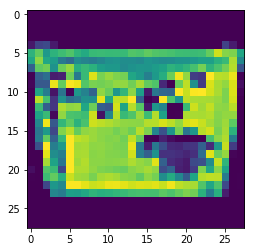

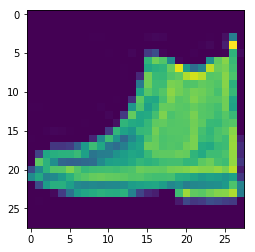

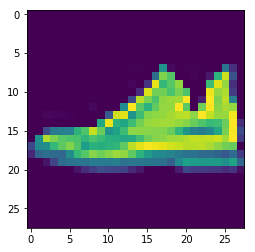

In [1]:
import tensorflow as tf  
from PIL import Image  
import matplotlib.pyplot as plt
  
filename_queue = tf.train.string_input_producer(['train.tfrecords'])  
reader = tf.TFRecordReader()  
_, example = reader.read(filename_queue)  
features = tf.parse_single_example(example,  
                                   features={'label1': tf.FixedLenFeature([], tf.int64),  
                                             'data1': tf.FixedLenFeature([], tf.string)})  
image = tf.decode_raw(features['data1'], tf.uint8) 
image = tf.reshape(image, [28, 28, 1])  
label = tf.cast(features['label1'], tf.int32)  
  
image_batch, label_batch = tf.train.shuffle_batch([image, label],  
                                                  batch_size=1,  
                                                  capacity=100,  
                                                  min_after_dequeue=50)  
image = tf.reshape(image_batch, [28, 28])  
with tf.Session() as sess:  
    init = tf.global_variables_initializer()  
    sess.run(init)  
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)  
    for i in range(3):  
        data, label = sess.run([image, label_batch]) 
        plt.imshow(data) 
        plt.show()
        result = Image.fromarray(data)  
        result.save(str(i) + '.png')
        pass  
    pass  
    coord.request_stop()  
    coord.join(threads)